In [1]:
!pip install openpyxl

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Data source: https://webb-site.com/dbpub/veFR.asp?y=2025&m=0&b=1&vc=1&sort=f1dn

xls = pd.ExcelFile("HK private cars registeration_2023-2025.06_original_data.xlsx")

In [4]:
combined_df = pd.DataFrame()

In [5]:
for year in ["2023", "2024", "2025"]:
    df = xls.parse(sheet_name = year)
    df["Year"]= int(year)
    # There are others column in 2025 data , refering to some hybrid types.
    if "Others" not in df.columns:
        df["Others"] = 0
    if "Others share %" not in df.columns:
        df["Others share %"] = 0

    combined_df = pd.concat([combined_df, df], ignore_index = True)
    

In [6]:
 combined_df.head()

,Brand,Petrol,Electric,Total,Petrol share %,Electric share %,Total share %,Year,Others,Others share %
0,TESLA,0.0,9639.0,9639,0.00,33.77,21.82,2023,0,0.0
1,TOYOTA,6705.0,1.0,6706,42.90,0.00,15.18,2023,0,0.0
2,B.M.W.,262.0,4981.0,5243,1.68,17.45,11.87,2023,0,0.0
3,MERCEDES BENZ,1029.0,3603.0,4632,6.58,12.62,10.49,2023,0,0.0
4,BYD,0.0,3720.0,3720,0.00,13.03,8.42,2023,0,0.0


In [7]:
combined_df.to_csv("HK_Private_Cars_Combined_2023_2025.csv", index=False)

In [8]:
df = pd.read_csv("HK_Private_Cars_Combined_2023_2025.csv")

In [9]:
df.head()

,Brand,Petrol,Electric,Total,Petrol share %,Electric share %,Total share %,Year,Others,Others share %
0,TESLA,0.0,9639.0,9639,0.00,33.77,21.82,2023,0,0.0
1,TOYOTA,6705.0,1.0,6706,42.90,0.00,15.18,2023,0,0.0
2,B.M.W.,262.0,4981.0,5243,1.68,17.45,11.87,2023,0,0.0
3,MERCEDES BENZ,1029.0,3603.0,4632,6.58,12.62,10.49,2023,0,0.0
4,BYD,0.0,3720.0,3720,0.00,13.03,8.42,2023,0,0.0


In [10]:
# Calculate overall EV share trend (2023–2025, across all brands)
ev_trend = df.groupby("Year").apply(lambda x : x["Electric"].sum() / x["Total"].sum() *100).reset_index(name="EV_share_%")
petrol_trend = df.groupby("Year").apply(lambda x : x["Petrol"].sum() / x["Total"].sum() *100).reset_index(name="Petrol_share_%")
ev_trend["Year"] = ev_trend["Year"].astype(int)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_36640\2807323520.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ev_trend = df.groupby("Year").apply(lambda x : x["Electric"].sum() / x["Total"].sum() *100).reset_index(name="EV_share_%")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_36640\2807323520.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  petrol_trend = df.groupby("Year").apply(lambda x : x["P

In [11]:
ev_trend

,Year,EV_share_%
0,2023,64.617721
1,2024,71.091223
2,2025,70.492173


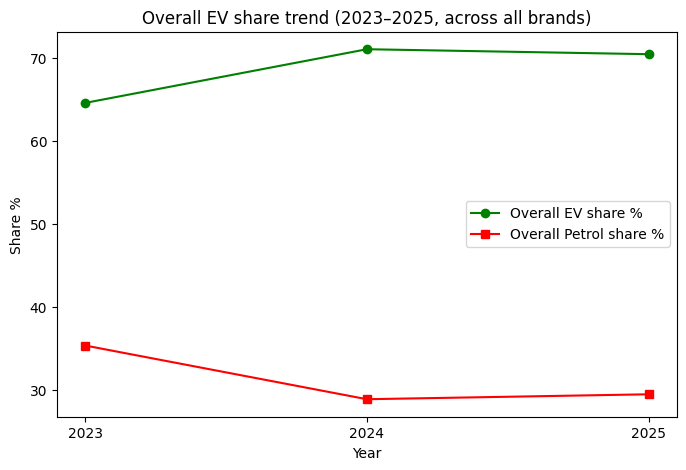

In [23]:
plt.figure(figsize=(8,5))
plt.plot(ev_trend["Year"], ev_trend["EV_share_%"], marker="o", color="green", label="Overall EV share %")
plt.plot(petrol_trend["Year"],petrol_trend["Petrol_share_%"], marker="s", color="red", label="Overall Petrol share %")

plt.title("Overall EV share trend (2023–2025, across all brands)")
plt.xlabel("Year")
plt.ylabel("Share %")
plt.xticks(ev_trend["Year"])
plt.legend()
plt.savefig("images/Overall_EV_share_trend.png", dpi=300, bbox_inches="tight")
plt.show()

In [24]:
# Findings:
# Overall Market Trend (2023–2025)
# EV market share rises from around 65% to above 70%, becoming the clear dominant powertrain.
# Petrol vehicles continue to decline steadily, being rapidly displaced.

In [25]:
# Calculate Tesla share trend across EV brands in 2023-2025
tesla_df = df[df["Brand"] == "TESLA"]

In [26]:
tesla_df.head()

,Brand,Petrol,Electric,Total,Petrol share %,Electric share %,Total share %,Year,Others,Others share %
0,TESLA,0.0,9639.0,9639,0.0,33.77,21.82,2023,0,0.0
61,TESLA,0.0,9556.0,9556,0.0,28.78,20.46,2024,0,0.0
127,TESLA,0.0,3889.0,3889,0.0,25.24,17.79,2025,0,0.0


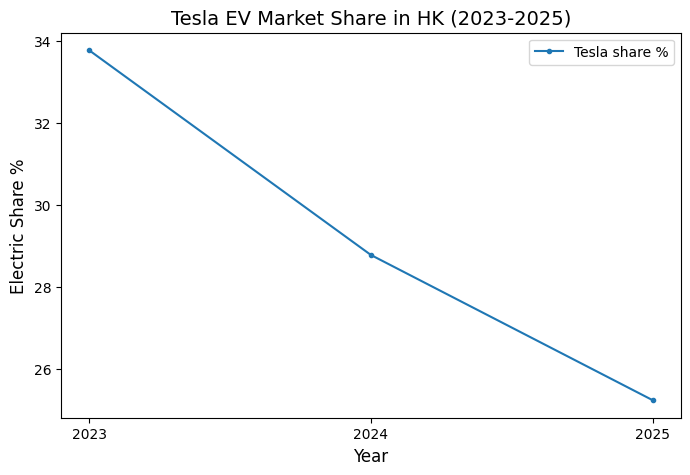

In [27]:
plt.figure(figsize=(8,5))
plt.plot(tesla_df["Year"], tesla_df["Electric share %"], marker=".", label = "Tesla share %")

plt.title("Tesla EV Market Share in HK (2023-2025)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Electric Share %", fontsize=12)
plt.xticks(tesla_df["Year"])  
plt.legend()
plt.savefig("images/tesla_share_trend.png", dpi=300, bbox_inches="tight")
plt.show()

In [28]:
top5_ev_list = []

In [29]:
for year, group in df.groupby("Year"):
    group = group[group["Brand"] != "All brands"]
    top5_ev = group.sort_values("Electric", ascending = False).head(5).copy()
    total = group["Total"].sum()
    top5_ev["EV_share_%"] = top5_ev["Electric"]/ total * 100
    top5_ev_list.append(top5_ev)

top5_ev_df = pd.concat(top5_ev_list)
print(top5_ev_df["Brand"].unique())

['TESLA' 'B.M.W.' 'BYD' 'MERCEDES BENZ' 'M.G.' 'MAXUS' 'ZEEKR' 'XPENG']


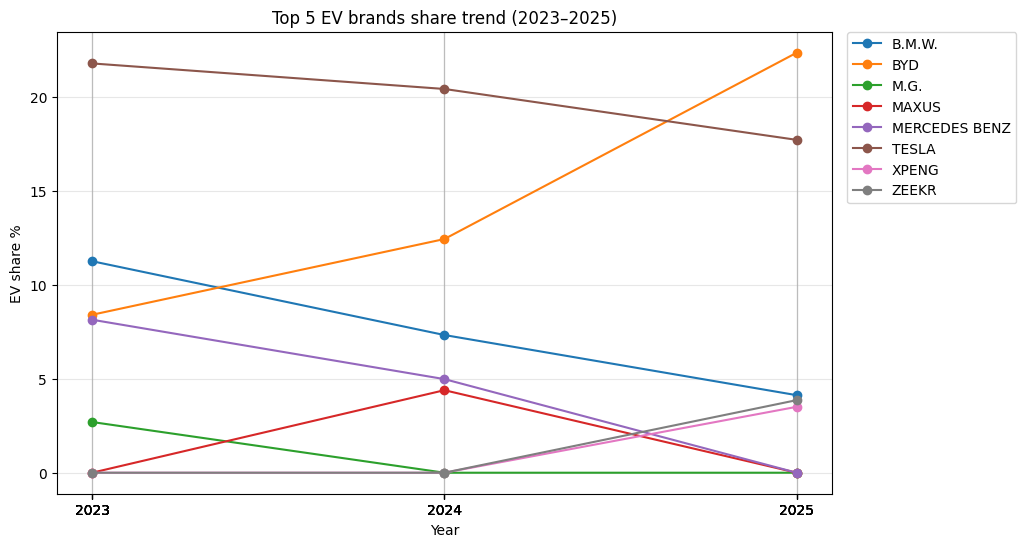

In [30]:
pivot_top5 = top5_ev_df.pivot_table(
    index = "Year",
    columns = "Brand",
    values = "EV_share_%",
    aggfunc = "sum",
    fill_value = 0,
    
)

plt.figure(figsize=(10,6))
for brand in pivot_top5.columns:
    plt.plot(pivot_top5.index, pivot_top5[brand], marker="o", label=brand)

plt.title("Top 5 EV brands share trend (2023–2025)")
plt.xlabel("Year")
plt.ylabel("EV share %")
plt.xticks(top5_ev_df["Year"])
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.grid(alpha=0.3)
plt.savefig("images/top5_ev_share.png", dpi=300, bbox_inches="tight")
plt.show()

In [20]:
# Revised Conclusion

# EV adoption continues to rise, with EVs already exceeding 70% of new registrations by mid-2025.

# BYD shows exceptional growth in the first half of 2025, likely overtaking several competitors if momentum continues.

# Tesla’s share keeps declining despite the overall EV market expansion—an early signal of intensified competition.

# Traditional luxury brands (B.M.W., Mercedes) maintain smaller shares, with limited growth in the EV segment.